In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_path="/content/train_qWM28Yl.csv"
test_path="/content/test_zo1G9sv.csv"
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
train_df.info()
test_df.info()
id=test_df['policy_id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

columns=['is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger',
         'is_power_steering','engine_type','is_tpms','make','gear_box','transmission_type',
         'max_power','max_torque','model','length','segment','gross_weight','ncap_rating',
         'airbags','is_esc','turning_radius','rear_brakes_type','is_parking_camera'
         ]

for i in columns:
    train_df=train_df.drop([i],axis=1)
    test_df=test_df.drop([i],axis=1)
ord_enc = OrdinalEncoder()
cols=['area_cluster','fuel_type','is_adjustable_steering','is_parking_sensors',
      'steering_type','is_front_fog_lights','is_brake_assist','is_power_door_locks',
      'is_central_locking','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw',
      'is_speed_alert']
for i in cols:
     train_df[i] = ord_enc.fit_transform(train_df[[i]])
for i in cols:
     test_df[i] = ord_enc.fit_transform(test_df[[i]])
print(train_df.head(7))
print(test_df.head(7))

  policy_id  policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0   ID00001       0.515874        0.05             0.644231           0.0   
1   ID00002       0.672619        0.02             0.375000          11.0   
2   ID00003       0.841110        0.02             0.384615          15.0   
3   ID00004       0.900277        0.11             0.432692          16.0   
4   ID00005       0.596403        0.11             0.634615          17.0   
5   ID00006       1.018709        0.07             0.519231          18.0   
6   ID00007       0.097992        0.16             0.403846          19.0   

   population_density  fuel_type  is_adjustable_steering  is_parking_sensors  \
0                4990        0.0                     0.0                 1.0   
1               27003        0.0                     0.0                 1.0   
2                4076        0.0                     0.0                 1.0   
3               21622        2.0                     1.0       

In [ ]:
from sklearn.preprocessing import StandardScaler

cols=['population_density','width','height','displacement']
scaler = StandardScaler()
for i in cols:
  x=train_df[i]
  x=x.values.reshape((-1,1))
  train_df[i]=scaler.fit_transform(x)

for i in cols:
  x=test_df[i]
  x=x.values.reshape((-1,1))
  test_df[i]=scaler.fit_transform(x)

In [ ]:
print(train_df['policy_id'].value_counts())
train_df=train_df.drop(['policy_id'],axis=1)
test_df=test_df.drop(['policy_id'],axis=1)

ID00001    1
ID39053    1
ID39055    1
ID39056    1
ID39057    1
          ..
ID19535    1
ID19536    1
ID19537    1
ID19538    1
ID58592    1
Name: policy_id, Length: 58592, dtype: int64


In [ ]:
corr_matrix=train_df.corr()
print('correlation metrix for dataset: ',corr_matrix["is_claim"].sort_values(ascending=False))

correlation metrix for dataset:  is_claim                            1.000000
policy_tenure                       0.078747
age_of_policyholder                 0.022435
is_adjustable_steering              0.013917
cylinder                            0.013434
is_front_fog_lights                 0.011825
is_brake_assist                     0.010893
is_driver_seat_height_adjustable    0.010686
width                               0.009947
fuel_type                           0.009612
area_cluster                        0.009425
is_parking_sensors                  0.008419
is_day_night_rear_view_mirror       0.007989
displacement                        0.007678
is_speed_alert                      0.007307
is_power_door_locks                 0.006637
is_central_locking                  0.006637
is_ecw                              0.006637
height                             -0.002024
steering_type                      -0.009608
population_density                 -0.017808
age_of_car            

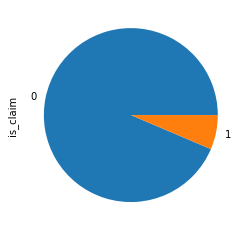

In [ ]:
train_df['is_claim'].value_counts().plot(kind='pie')

y=train_df['is_claim']

In [ ]:
print(train_df.head(3))

   policy_tenure  age_of_car  age_of_policyholder  area_cluster  \
0       0.515874        0.05             0.644231           0.0   
1       0.672619        0.02             0.375000          11.0   
2       0.841110        0.02             0.384615          15.0   

   population_density  fuel_type  is_adjustable_steering  is_parking_sensors  \
0           -0.783513        0.0                     0.0                 1.0   
1            0.462975        0.0                     0.0                 1.0   
2           -0.835268        0.0                     0.0                 1.0   

   displacement  cylinder  ...    height  is_front_fog_lights  \
0     -1.375713         3  ... -0.983846                  0.0   
1     -1.375713         3  ... -0.983846                  0.0   
2     -1.375713         3  ... -0.983846                  0.0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0              0.0                  0.0                 0.0   
1              0.0     

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
train_df, y = sm.fit_resample(train_df, y)
print(train_df['is_claim'].value_counts())

train_df=train_df.drop(['is_claim'],axis=1)
train_x,valid_x,train_y,valid_y=train_test_split(train_df,y,test_size=0.25)
print("train_data ->",train_x.shape)
print("valid_data ->",valid_x.shape)
print("train_label ->",train_y.shape)
print("valid_label ->",valid_y.shape)

0    54844
1    54844
Name: is_claim, dtype: int64
train_data -> (82266, 21)
valid_data -> (27422, 21)
train_label -> (82266,)
valid_label -> (27422,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV


mnb=MultinomialNB()  #0.5547740694048173
lr=LogisticRegression()  #0.4981388574202945
rf=RandomForestClassifier(n_estimators=165,max_depth=132) #0.9355914421671849
svm=SVC()
cl=DecisionTreeClassifier()  #0.9139629200463499
#evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
#clf = RFE(rf, n_features_to_select=25, step=1)
#rf = GridSearchCV(rf, parameters,cv=5)
rf.fit(train_x, train_y)
results=rf.predict(valid_x)
print(f1_score(valid_y,results)) #0.5547716055516909


0.9126541767053832


In [ ]:
def get_classification_metric(testy, probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(testy, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    return fscore[ix]

#print( 'naive bayes Score:', get_classification_metric(valid_y,nb_predictions))
#print( 'decision tree Score:', get_classification_metric(valid_y,dt_predictions))
#print( 'linear regression Score:', get_classification_metric(valid_y,lr_predictions))
#print( 'svc Score:', get_classification_metric(valid_y,svc_predictions))
print( 'knn Score:', get_classification_metric(valid_y,results)) #0.11976124767344842

knn Score: 0.9126541767053832


In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(valid_y, results))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     13599
           1       0.91      0.92      0.91     13823

    accuracy                           0.91     27422
   macro avg       0.91      0.91      0.91     27422
weighted avg       0.91      0.91      0.91     27422



In [ ]:
test_ids=id
prediction=rf.predict(test_df)
print(np.unique(prediction))

np.savetxt(
    'submission.csv',
    np.rec.fromarrays([test_ids, prediction]),
    fmt=['%s', '%d'],
    delimiter=',',
    header='policy_id,is_claim',
    comments='',
)

[0 1]


In [ ]:
file=pd.read_csv("/content/submission.csv")
file.info()
print(file['is_claim'].value_counts())#0    33611   1     5452


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   policy_id  39063 non-null  object
 1   is_claim   39063 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 610.5+ KB
0    33822
1     5241
Name: is_claim, dtype: int64
